In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")


In [129]:
df=pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",header=1)

In [130]:
df.head(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [131]:
data = df.to_dict(orient = 'records')

In [132]:
[features for features in df.columns if df[features].isnull().sum()>1]

['Classes  ']

In [133]:
df.duplicated().sum()

0

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [135]:
df.nunique()

day             33
month            5
year             2
Temperature     20
 RH             63
 Ws             19
Rain            40
FFMC           174
DMC            167
DC             199
ISI            107
BUI            175
FWI            128
Classes          9
dtype: int64

In [136]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [137]:
df.shape

(246, 14)

In [138]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [139]:
df.loc[ :122,"Region"]=1
df.loc[122: ,"Region"]=2
df[["Region"]]=df[["Region"]].astype(int)

In [140]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [141]:
df.dropna().reset_index(drop=True)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,2
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [142]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [156]:
df= df.drop(122).reset_index(drop=True)

In [157]:
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [160]:
df[['month', 'day', 'year', 'Temperature','RH', 'Ws']] = df[['month', 'day', 'year', 'Temperature','RH', 'Ws']].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    object 
 10  ISI          243 non-null    object 
 11  BUI          243 non-null    object 
 12  FWI          243 non-null    object 
 13  Classes      242 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(3), int32(7), object(5)
memory usage: 22.0+ KB


In [170]:
objects = [feature for feature in df.columns if df[feature].dtypes == 'O']

for feature in objects:
    if feature != 'Classes':
        try:
            df[feature] = df[feature].astype(float)
        except ValueError as e:
            print(f"Error converting column {feature} to float: {e}")


Error converting column DC to float: could not convert string to float: '14.6 9'
Error converting column FWI to float: could not convert string to float: 'fire   '


In [172]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.814815,8.792058,1.0,8.00,16.0,23.00,31.0
month,243.0,7.506173,1.111065,6.0,7.00,8.0,8.00,9.0
year,243.0,2012.000000,0.000000,2012.0,2012.00,2012.0,2012.00,2012.0
Temperature,243.0,32.172840,3.641327,22.0,30.00,32.0,35.00,42.0
RH,243.0,61.901235,14.903495,21.0,52.00,63.0,73.50,90.0
Ws,243.0,15.518519,2.806918,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.760905,2.003528,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.973251,14.304628,28.6,72.45,83.7,88.30,96.0
DMC,243.0,14.723457,12.368735,0.7,5.80,11.3,20.80,65.9
ISI,243.0,4.791358,4.175287,0.0,1.40,3.5,7.30,19.0


In [174]:
df.Classes.value_counts()

fire             131
not fire         100
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [176]:
df.Classes = df.Classes.str.strip()
df.Classes.value_counts()

fire        137
not fire    105
Name: Classes, dtype: int64

In [177]:
df[ :122]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire,1
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire,1
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,1
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire,1


In [178]:
df[122:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2
123,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2
124,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,not fire,2
125,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,2
126,6,6,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2
239,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [179]:
df.to_csv('Algerian_forest_fires_dataset_CLEANED.csv', index=False)

In [186]:
df1 = df.drop(['day','month','year'], axis=1)

In [192]:
df1['Classes']= np.where(df1['Classes']== 'not fire',0,1)

In [196]:
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,1,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,1


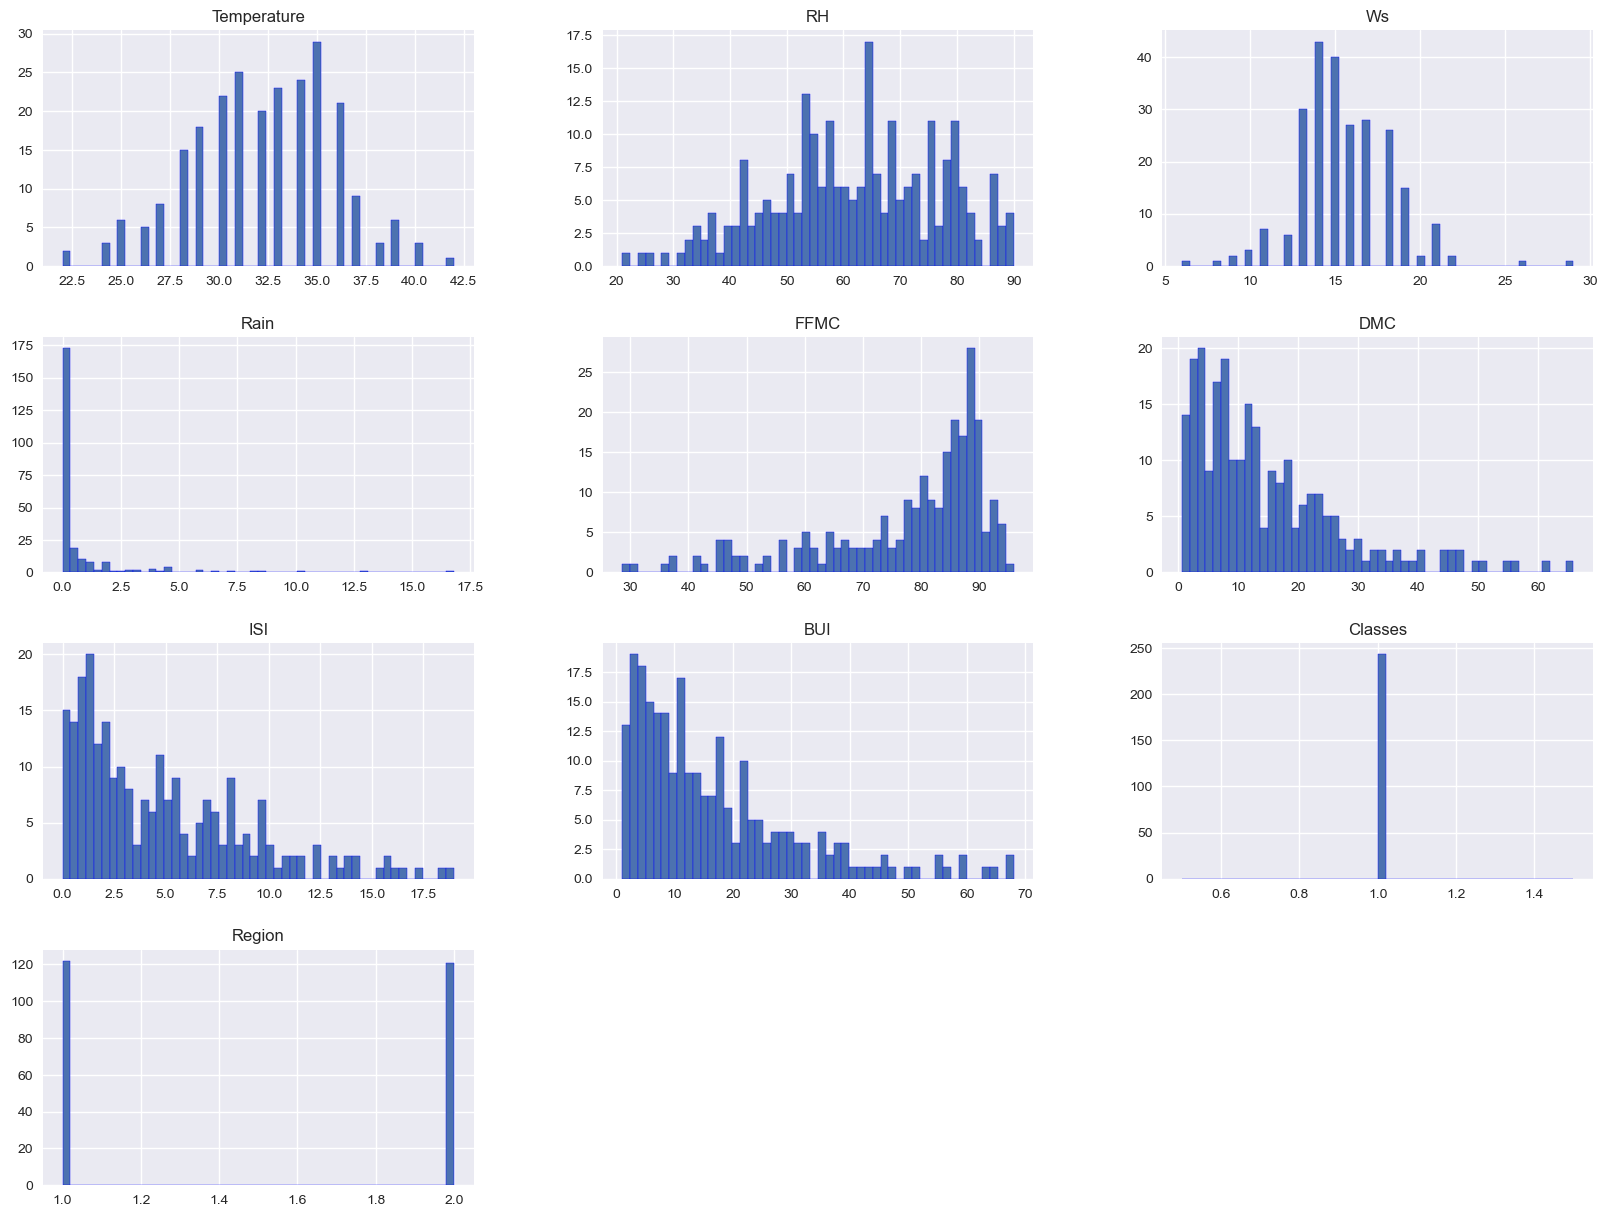

In [197]:
plt.style.use('seaborn')
df1.hist(bins=50, figsize=(20,15), ec = 'b')
plt.show()

In [198]:
percentage = df.Classes.value_counts(normalize=True)*100
percentage

fire        56.61157
not fire    43.38843
Name: Classes, dtype: float64

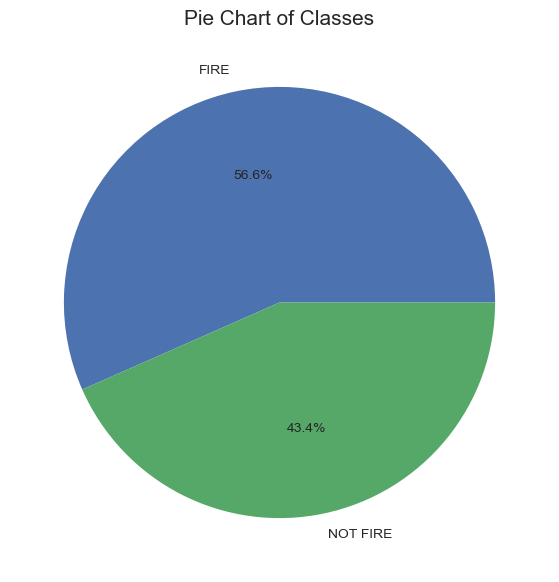

In [199]:
classeslabels = ["FIRE", "NOT FIRE"]
plt.figure(figsize =(12, 7))
plt.pie(percentage,labels = classeslabels,autopct='%2.1f%%')
plt.title ("Pie Chart of Classes", fontsize = 15)
plt.show()

<AxesSubplot:>

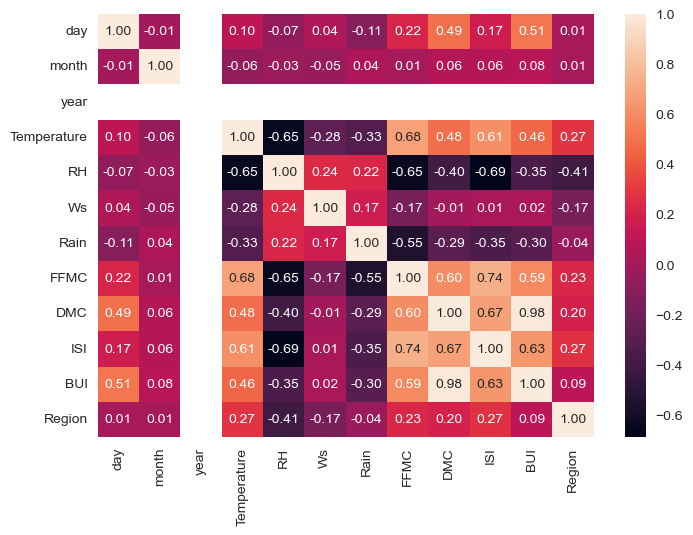

In [235]:
sns.heatmap(df.corr(),annot=True,square=False, fmt='.2f' )

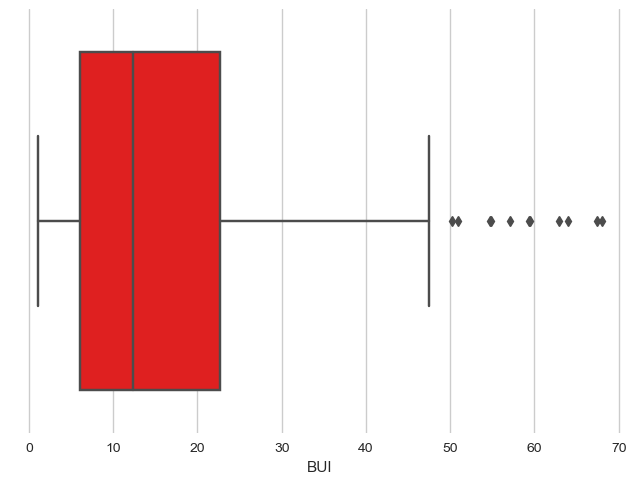

In [228]:
ax = sns.boxplot(df['BUI'], color= 'red')

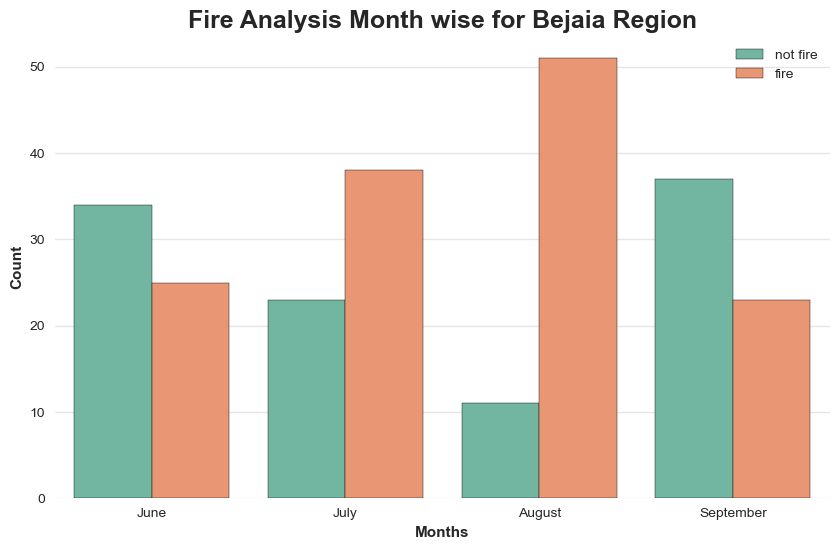

In [203]:
dftemp= df.loc[df['Region']== 1]
plt.subplots(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= df,ec = 'black', palette= 'Set2')
plt.title('Fire Analysis Month wise for Bejaia Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

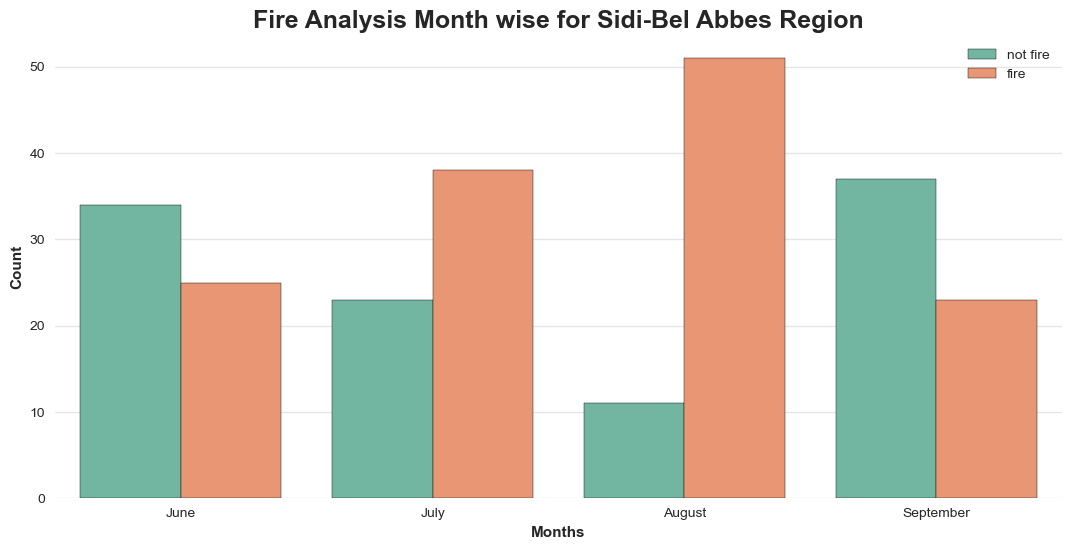

In [204]:
dftemp= df.loc[df['Region']== 2]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= df,ec = 'black', palette= 'Set2')
plt.title('Fire Analysis Month wise for Sidi-Bel Abbes Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

In [205]:
def barchart(feature,xlabel):
    plt.figure(figsize=[14,8])
    by_feature =  df1.groupby([feature], as_index=False)['Classes'].sum()
    ax = sns.barplot(x=feature, y="Classes", data=by_feature[[feature,'Classes']], estimator=sum)
    ax.set(xlabel=xlabel, ylabel='Fire Count')

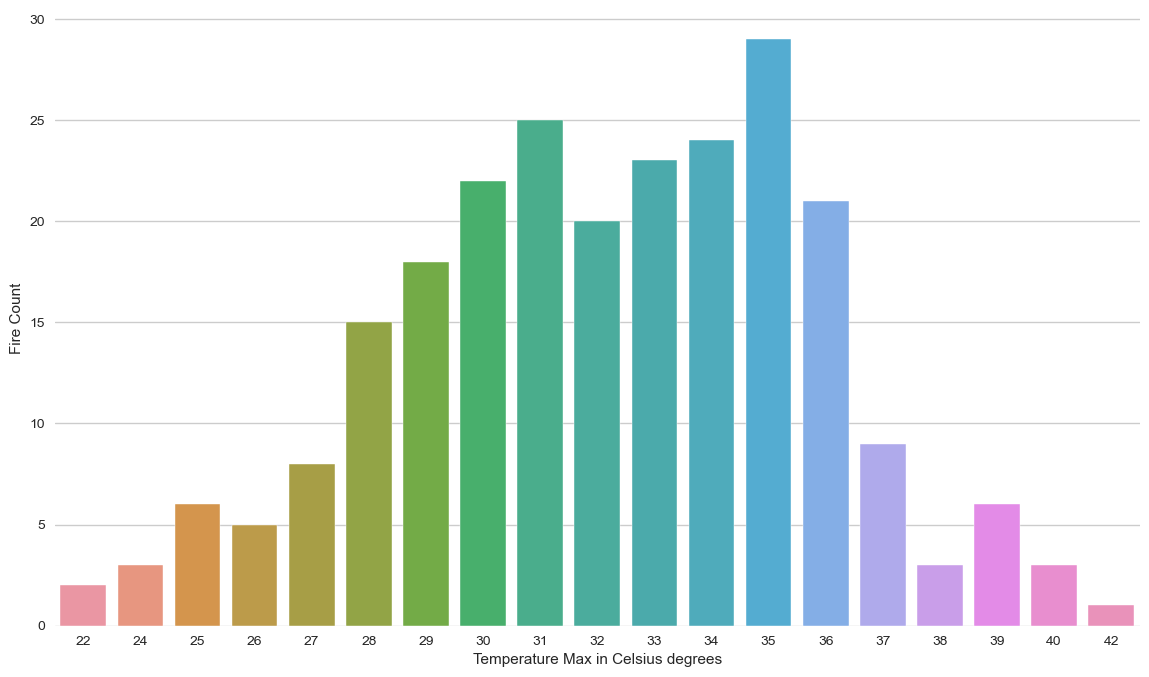

In [206]:
barchart('Temperature','Temperature Max in Celsius degrees')

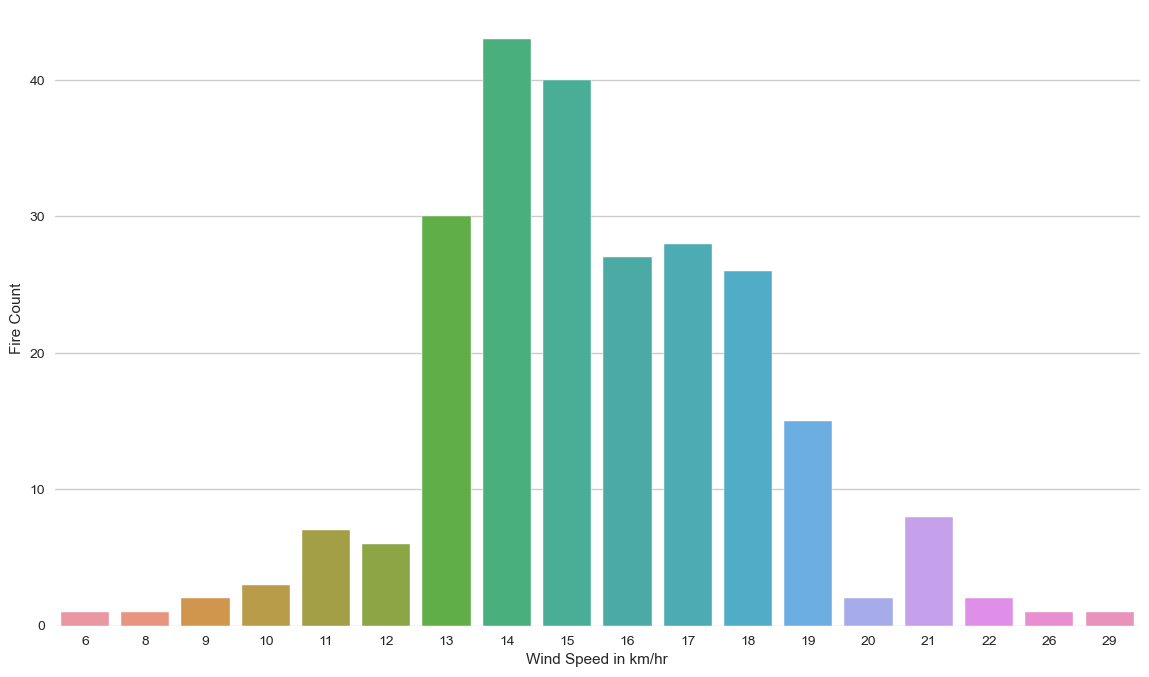

In [210]:
barchart('Ws', 'Wind Speed in km/hr')

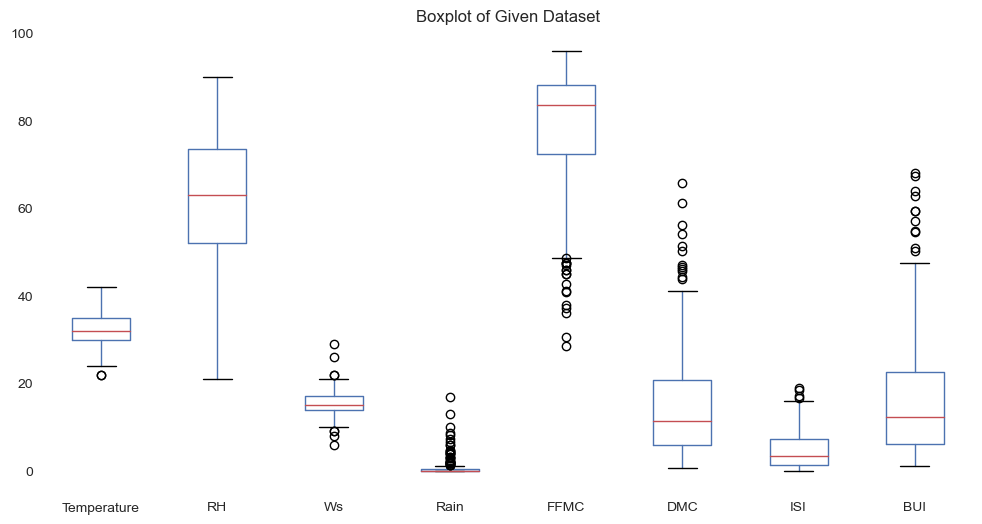

In [216]:
dftemp = df1.drop(['Classes', 'Region'], axis=1)
fig = plt.figure(figsize =(12, 6))
ax = dftemp.boxplot(grid=False)
ax.set_title("Boxplot of Given Dataset")
plt.show()

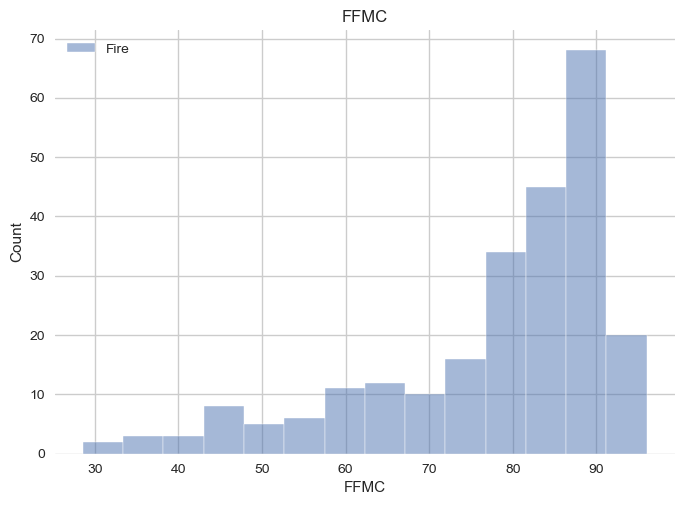

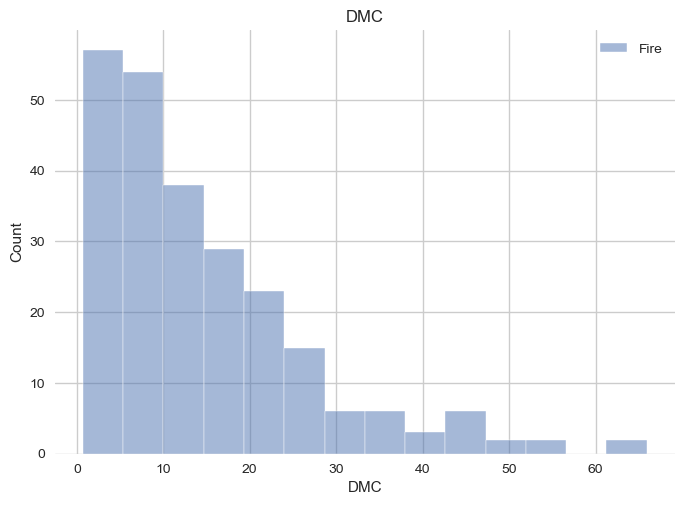

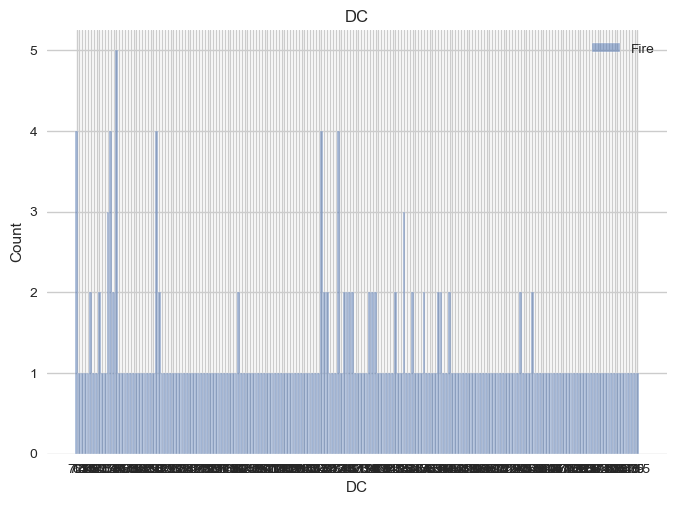

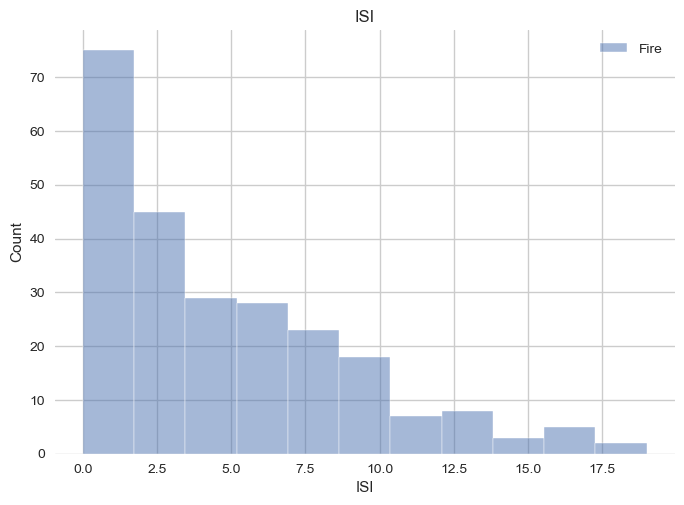

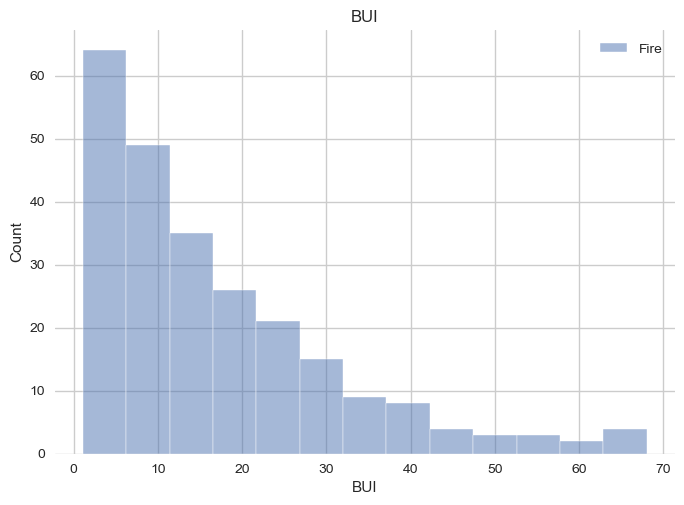

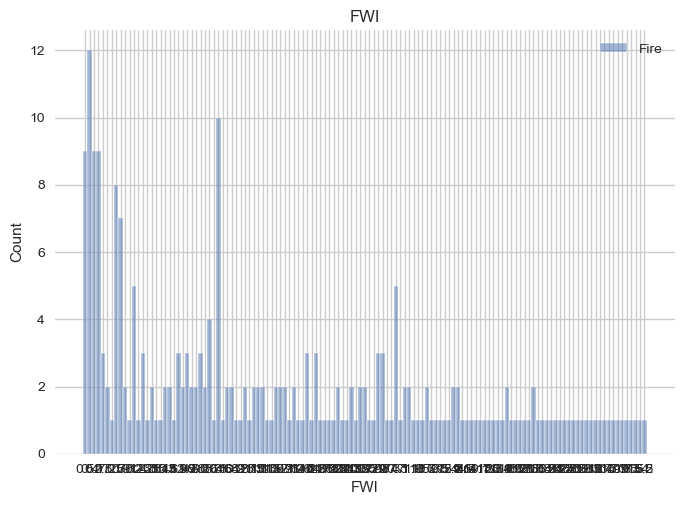

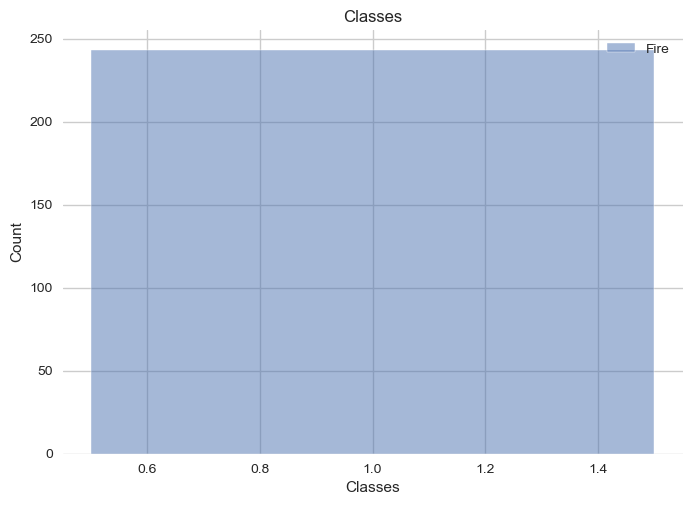

In [217]:
dftemp = dftemp = df1.drop(['Region','Temperature','Rain','Ws','RH'], axis=1)
for feature in dftemp:
    sns.histplot(data = dftemp,x=feature, hue = 'Classes')
    plt.legend(labels=['Fire','Not Fire'])
    plt.title(feature)
    plt.show()